The Llama 3.2 90B Vision Instruct model is a multimodal, fine-tuned model,leveraging 90 billion parameters to deliver unparalleled capabilities in image understanding, visual reasoning, and multimodal interaction, enabling advanced applications such as image captioning, image-text retrieval, visual grounding, visual question answering, and document visual question answering, with its unique ability to reason and draw conclusions from visual and textual inputs, making it an ideal choice for applications requiring sophisticated visual intelligence, such as image analysis, document processing, multimodal chatbots, and autonomous systems.

### For text input


Sends messages to the specified Amazon Bedrock model. Converse provides a consistent interface that works with all models that support messages. This allows you to write code once and use it with different models. <br>
https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/bedrock-runtime/client/converse.html

In [81]:
# Define your messages
messages = [
    {
        'role': 'user',
        'content': [
            {
                'text': 'What is machine learning? '
            }
        ]
    }
]

In [82]:
import boto3
import json

# Create a Boto3 client for Bedrock Runtime
bedrock_client = boto3.client(service_name='bedrock-runtime')

# Define the prompt and other parameters
modelId = 'us.meta.llama3-2-90b-instruct-v1:0'

# Invoke the model
# Invoke the model
response = bedrock_client.converse(
    modelId=modelId,
    messages=messages,
    inferenceConfig={
        'maxTokens': 300,
        'temperature': 0.1,
        'topP': 0.9
    }
)

In [83]:
# Process the response
try:
    text_response = response['output']['message']['content'][0]['text']
    print(text_response)
except KeyError as e:
    print(f"Error accessing response: {e}")

Machine learning is a subset of artificial intelligence (AI) that involves training algorithms to learn from data and make predictions or decisions without being explicitly programmed. It's a way to enable computers to automatically improve their performance on a task by learning from experience, rather than relying on a set of pre-defined rules.

Machine learning algorithms are designed to analyze data, identify patterns, and make predictions or decisions based on that data. The goal is to enable computers to learn from data and improve their performance over time, without requiring manual intervention.

There are several types of machine learning, including:

1. **Supervised learning**: The algorithm is trained on labeled data, where the correct output is already known. The goal is to learn a mapping between input data and output labels.
2. **Unsupervised learning**: The algorithm is trained on unlabeled data, and the goal is to discover patterns or structure in the data.
3. **Reinfo

#### The response body returns the token usage as well e.g. 'usage': {'input_tokens': 41, 'output_tokens': 300}}

In [84]:
response

{'ResponseMetadata': {'RequestId': '6098c92b-9bf5-40d8-a1f8-029d646fad89',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Fri, 22 Nov 2024 06:41:35 GMT',
   'content-type': 'application/json',
   'content-length': '1864',
   'connection': 'keep-alive',
   'x-amzn-requestid': '6098c92b-9bf5-40d8-a1f8-029d646fad89'},
  'RetryAttempts': 0},
 'output': {'message': {'role': 'assistant',
   'content': [{'text': "Machine learning is a subset of artificial intelligence (AI) that involves training algorithms to learn from data and make predictions or decisions without being explicitly programmed. It's a way to enable computers to automatically improve their performance on a task by learning from experience, rather than relying on a set of pre-defined rules.\n\nMachine learning algorithms are designed to analyze data, identify patterns, and make predictions or decisions based on that data. The goal is to enable computers to learn from data and improve their performance over time, without re

### For multimodal input with images



In [85]:
#test_image = "food.jpg"
test_image = "income_statement.png"

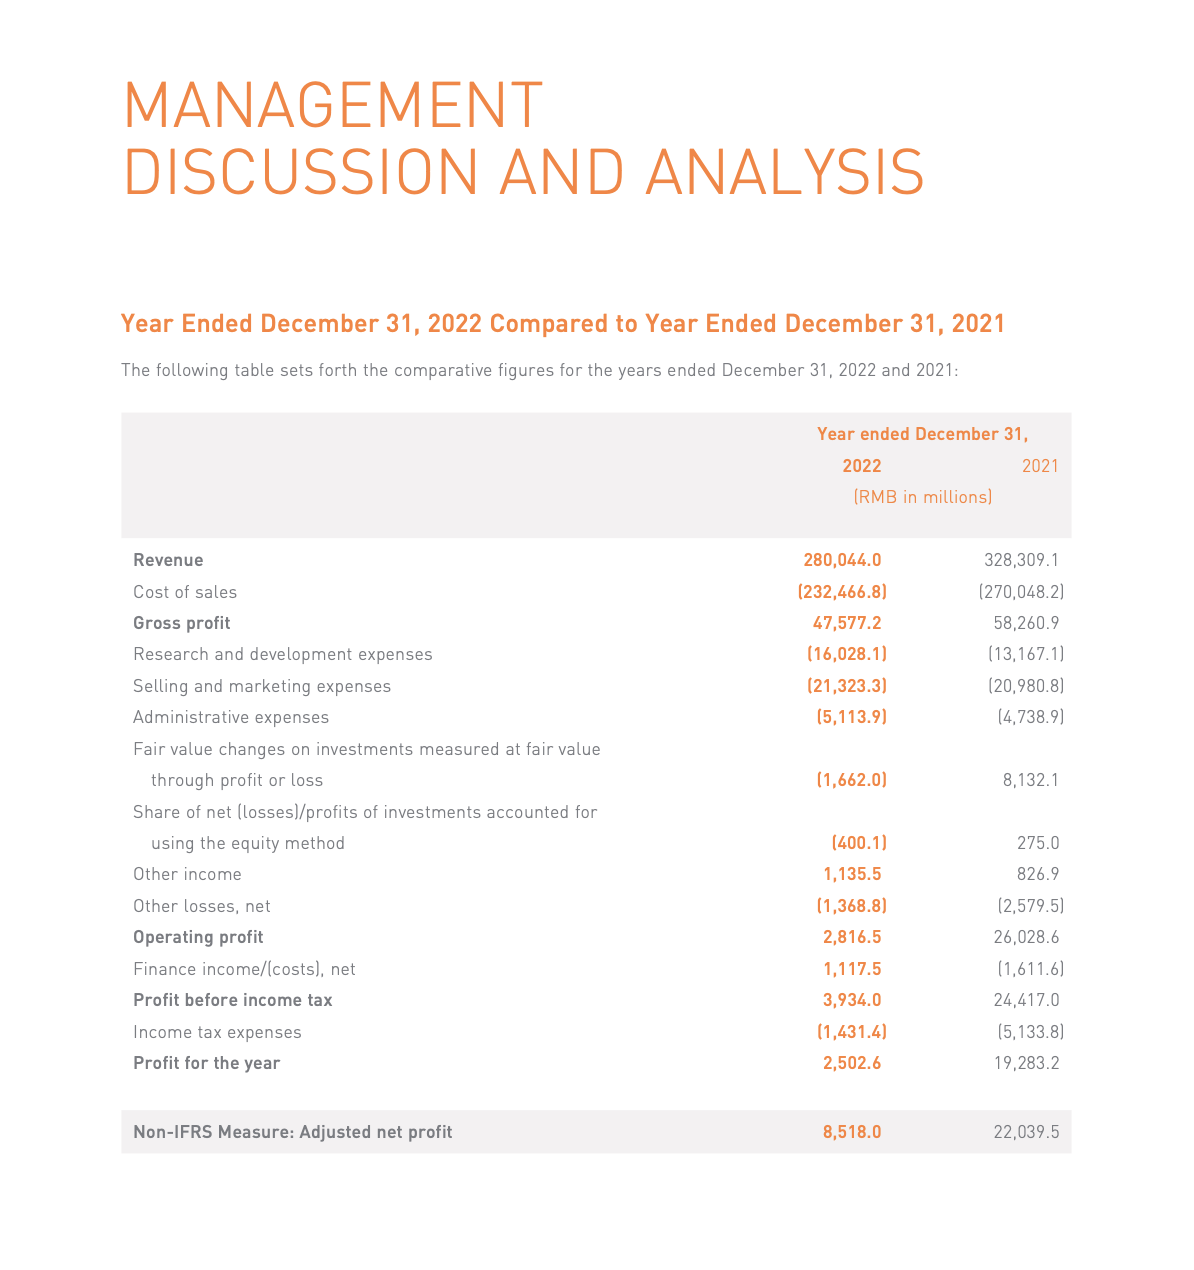

In [86]:
from PIL import Image
import base64

raw_image = Image.open(test_image).convert('RGB')
display(raw_image)

**Using the Converse API** <br>
https://docs.aws.amazon.com/bedrock/latest/userguide/conversation-inference-call.html

"format": "png | jpeg | gif | webp" <br>
You can include up to 20 images. Each image's size, height, and width must be no more than 3.75 MB, 8,000 px, and 8,000 px, respectively. <br>
You can include up to five documents. Each document's size must be no more than 4.5 MB. <br>

In [87]:
import io

def encode_image(img_file, max_size=1024):
    # Open and convert image
    with Image.open(img_file) as img:
        # Convert to RGB if needed
        if img.mode in ('RGBA', 'P'):
            img = img.convert('RGB')
        
        # Resize if needed
        if max(img.size) > max_size:
            ratio = max_size / max(img.size)
            new_size = tuple(int(dim * ratio) for dim in img.size)
            img = img.resize(new_size, Image.LANCZOS)
        
        # Convert to bytes
        buffer = io.BytesIO()
        img.save(buffer, format='JPEG', quality=95)
        return buffer.getvalue()

#### You can check out the income statement and the generated description

In [88]:
image_bytes = encode_image(test_image,max_size=1024)

messages = [
    {
        "role": "user",
        "content": [
            {
                "image": {
                    "format": "jpeg",
                    "source": {
                        "bytes": image_bytes
                    }
                }
            },
            {
                "text": "What's the content of the image in details?"
            }
        ]
    }
]

In [89]:
import boto3
import json

# Create a Boto3 client for Bedrock Runtime
bedrock_client = boto3.client(service_name='bedrock-runtime')

# Define the prompt and other parameters
modelId = 'us.meta.llama3-2-90b-instruct-v1:0'

# Invoke the model
# Invoke the model
response = bedrock_client.converse(
    modelId=modelId,
    messages=messages,
    inferenceConfig={
        'maxTokens': 3000,
        'temperature': 0.1,
        'topP': 0.9
    }
)

In [90]:
# Process the response
try:
    text_response = response['output']['message']['content'][0]['text']
    print(text_response)
except KeyError as e:
    print(f"Error accessing response: {e}")

The image presents a comprehensive comparison of financial data between two years, specifically December 31, 2022, and December 31, 2021. The title, "MANAGEMENT DISCUSSION AND ANALYSIS," is prominently displayed in orange text at the top of the page.

**Table Structure:**

The table is divided into two columns, with the left column representing the year ended December 31, 2022, and the right column representing the year ended December 31, 2021. The table is further organized into sections, each focusing on a specific aspect of the company's financial performance.

**Revenue Section:**

*   **Revenue:** This section provides a detailed breakdown of the company's revenue streams, including:
    *   Cost of sales
    *   Gross profit
    *   Research and development expenses
    *   Selling and marketing expenses
    *   Administrative expenses
    *   Fair value changes on investments measured at fair value through profit or loss
    *   Share of net (losses)/profits of investments accou

In [91]:
response

{'ResponseMetadata': {'RequestId': '84d8fd13-1e2f-4f8e-85b0-b64dbb87450e',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Fri, 22 Nov 2024 06:41:59 GMT',
   'content-type': 'application/json',
   'content-length': '3782',
   'connection': 'keep-alive',
   'x-amzn-requestid': '84d8fd13-1e2f-4f8e-85b0-b64dbb87450e'},
  'RetryAttempts': 0},
 'output': {'message': {'role': 'assistant',
   'content': [{'text': 'The image presents a comprehensive comparison of financial data between two years, specifically December 31, 2022, and December 31, 2021. The title, "MANAGEMENT DISCUSSION AND ANALYSIS," is prominently displayed in orange text at the top of the page.\n\n**Table Structure:**\n\nThe table is divided into two columns, with the left column representing the year ended December 31, 2022, and the right column representing the year ended December 31, 2021. The table is further organized into sections, each focusing on a specific aspect of the company\'s financial performance.\n\n**Reven